In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('imputedtrain.csv')
test=pd.read_csv('imputedtest.csv')

In [4]:
for i in df.columns:
    df[i] = df[i].astype('float64')

In [5]:
df.dtypes

ID                         float64
City_Code                  float64
Region_Code                float64
Accomodation_Type          float64
Reco_Insurance_Type        float64
Lower_Age                  float64
Is_Spouse                  float64
Health Indicator           float64
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat            float64
Reco_Policy_Premium        float64
Response                   float64
dtype: object

In [7]:
from pycaret.classification import *
setting_up = setup(data = df.drop(['ID','Region_Code'],axis=1), target = 'Response', session_id=123,fix_imbalance =True)

,Description,Value
0,session_id,123
1,Target,Response
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(50882, 11)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7597,0.6696,0.0237,0.5429,0.0453,0.0252,0.0717,0.1400
catboost,CatBoost Classifier,0.7592,0.6709,0.0402,0.5051,0.0744,0.0403,0.0861,12.5910
lr,Logistic Regression,0.7590,0.5608,0.0000,0.0000,0.0000,0.0000,0.0000,0.3130
nb,Naive Bayes,0.7590,0.5567,0.0000,0.0000,0.0000,0.0000,0.0000,0.0250
ridge,Ridge Classifier,0.7590,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340
ada,Ada Boost Classifier,0.7590,0.6116,0.0000,0.0000,0.0000,-0.0001,-0.0019,0.2300
lda,Linear Discriminant Analysis,0.7590,0.5612,0.0000,0.0000,0.0000,0.0000,0.0000,0.0390
gbc,Gradient Boosting Classifier,0.7589,0.6421,0.0029,0.5189,0.0058,0.0026,0.0209,0.8190
rf,Random Forest Classifier,0.7505,0.6356,0.0809,0.4099,0.1350,0.0606,0.0883,0.8290
qda,Quadratic Discriminant Analysis,0.7471,0.5629,0.0313,0.2845,0.0562,0.0082,0.0159,0.0260


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7595,0.6673,0.0439,0.5082,0.0807,0.0443,0.0910,1.5070
gbc,Gradient Boosting Classifier,0.7594,0.6232,0.0139,0.5309,0.0270,0.0148,0.0530,2.0410
catboost,CatBoost Classifier,0.7574,0.6677,0.0705,0.4762,0.1227,0.0647,0.1057,17.5260
rf,Random Forest Classifier,0.7370,0.6183,0.1263,0.3666,0.1876,0.0736,0.0885,1.6560
ada,Ada Boost Classifier,0.7321,0.5626,0.0925,0.3049,0.1398,0.0357,0.0437,0.5590
et,Extra Trees Classifier,0.7299,0.6214,0.1496,0.3564,0.2107,0.0795,0.0905,14.5500
dt,Decision Tree Classifier,0.6477,0.5366,0.3221,0.2913,0.3058,0.0706,0.0708,0.1300
knn,K Neighbors Classifier,0.5641,0.5689,0.5204,0.2814,0.3652,0.0763,0.0846,0.1980
svm,SVM - Linear Kernel,0.5197,0.0000,0.5143,0.2296,0.2791,0.0259,0.0412,0.4270
qda,Quadratic Discriminant Analysis,0.4804,0.5498,0.6466,0.2639,0.3748,0.0496,0.0645,0.1400


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [7]:
mod1 = create_model('catboost')
mod2 = create_model('gbc')
mod3 = create_model('ada')
mod4 = create_model('rf')
mod5 = create_model('et')
mod6 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7580,0.6740,0.0128,0.4231,0.0249,0.0109,0.0365
1,0.7594,0.6600,0.0256,0.5116,0.0488,0.0265,0.0700
2,0.7588,0.6595,0.0233,0.4878,0.0445,0.0230,0.0623
3,0.7597,0.6705,0.0186,0.5333,0.0360,0.0201,0.0630
4,0.7580,0.6866,0.0245,0.4565,0.0465,0.0225,0.0577
5,0.7602,0.6906,0.0198,0.5862,0.0383,0.0229,0.0731
6,0.7611,0.6649,0.0210,0.6429,0.0406,0.0258,0.0836
7,0.7591,0.6661,0.0233,0.5000,0.0445,0.0236,0.0646
8,0.7621,0.6796,0.0385,0.6000,0.0723,0.0446,0.1052
9,0.7596,0.6974,0.0280,0.5217,0.0531,0.0293,0.0751


In [9]:
mod2 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7605,0.6693,0.0443,0.5352,0.0818,0.0467,0.0982
1,0.7594,0.6534,0.0443,0.5067,0.0815,0.0445,0.0912
2,0.7591,0.6582,0.0490,0.5000,0.0892,0.0483,0.0942
3,0.7583,0.6728,0.0373,0.4776,0.0692,0.0355,0.0767
4,0.7602,0.6760,0.0536,0.5227,0.0973,0.0549,0.1049
5,0.7608,0.6713,0.0419,0.5538,0.0779,0.0455,0.0997
6,0.7566,0.6650,0.0291,0.4310,0.0545,0.0248,0.0571
7,0.7593,0.6557,0.0326,0.5091,0.0613,0.0333,0.0785
8,0.7607,0.6678,0.0536,0.5349,0.0975,0.0560,0.1081
9,0.7596,0.6835,0.0536,0.5111,0.0970,0.0538,0.1017


In [ ]:
out1 = clf.predict_proba(test.drop(['ID', 'City_Code'],axis=1))[:,1]
out2 = clf2.predict_proba(test.drop(['ID', 'City_Code'],axis=1))[:,1]
out3 = clf3.predict_proba(test.drop(['ID', 'City_Code'],axis=1))[:,1]
out4 = clf4.predict_proba(test.drop(['ID', 'City_Code'],axis=1))[:,1]
out5 = clf5.predict_proba(test.drop(['ID', 'City_Code'],axis=1))[:,1]


In [13]:
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [10]:
test.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium'],
      dtype='object')

In [14]:
mod2.predict_proba(test)

ValueError: Number of features of the model must match the input. Model n_features_ is 10 and input n_features is 12 

In [92]:
import matplotlib.pyplot as plt

In [93]:
df.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

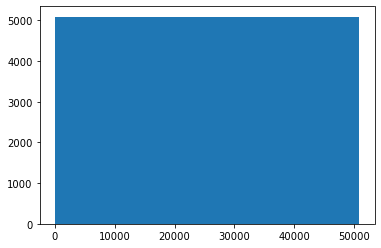

ID


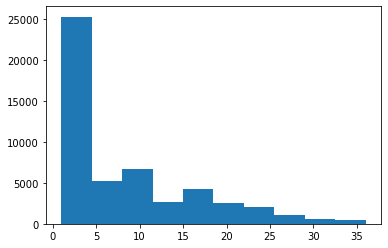

City_Code


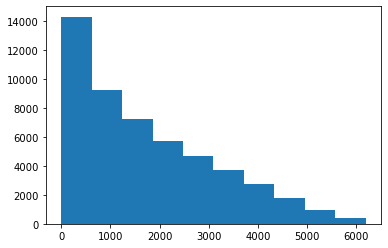

Region_Code


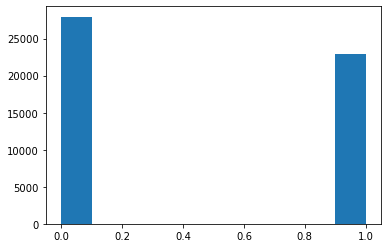

Accomodation_Type


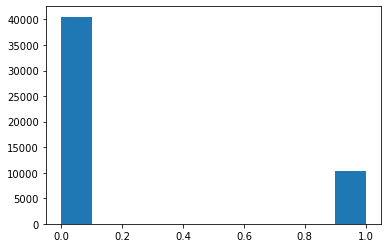

Reco_Insurance_Type


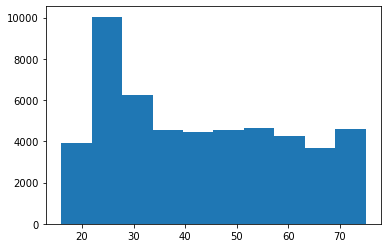

Lower_Age


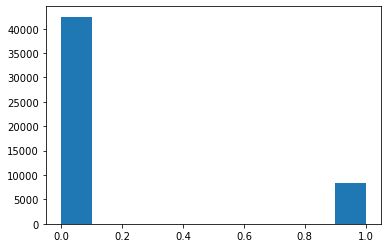

Is_Spouse


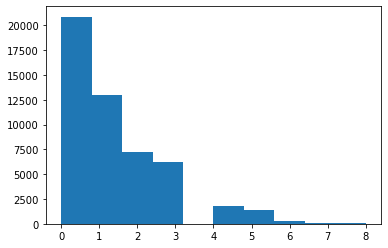

Health Indicator


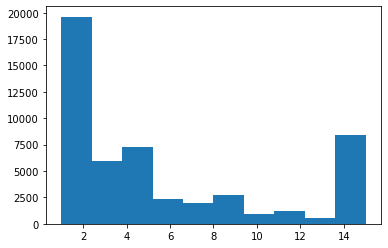

Holding_Policy_Duration


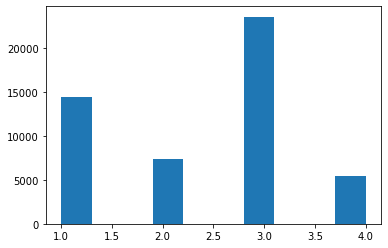

Holding_Policy_Type


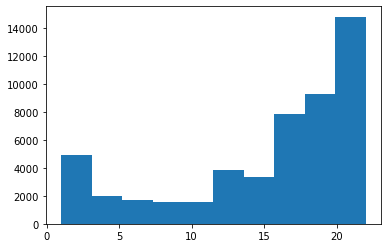

Reco_Policy_Cat


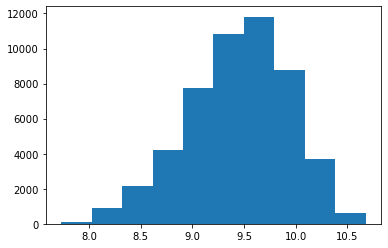

Reco_Policy_Premium


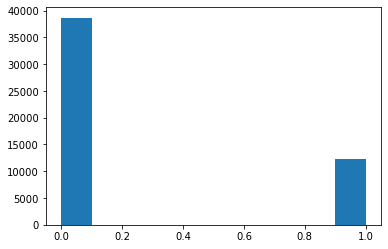

Response


In [94]:
for i in df.columns:
    plt.hist(df[i])
    plt.show()
    print(i)

ID


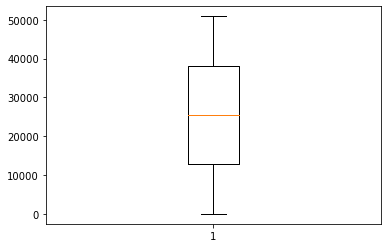

City_Code


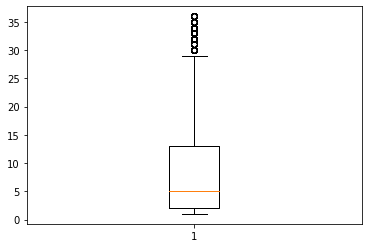

Region_Code


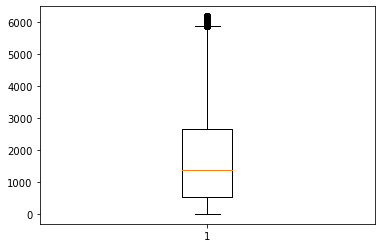

Accomodation_Type


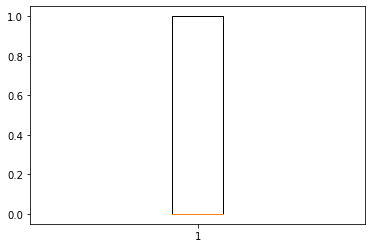

Reco_Insurance_Type


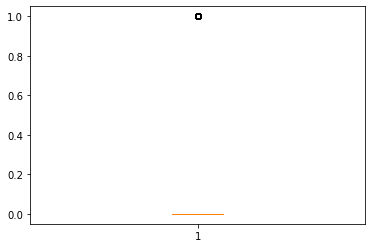

Lower_Age


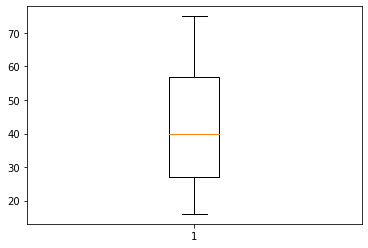

Is_Spouse


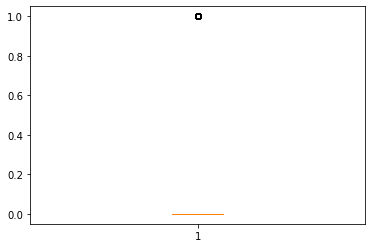

Health Indicator


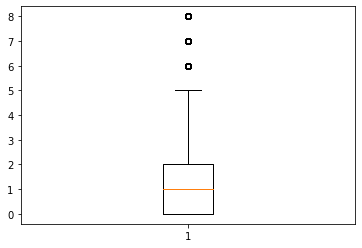

Holding_Policy_Duration


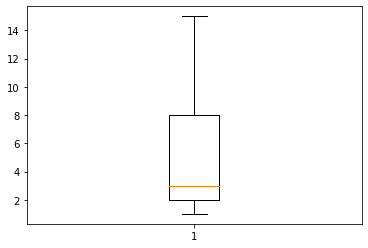

Holding_Policy_Type


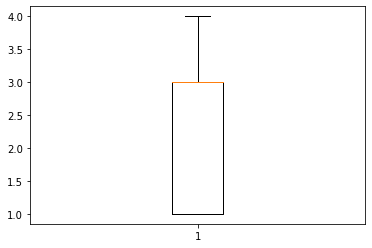

Reco_Policy_Cat


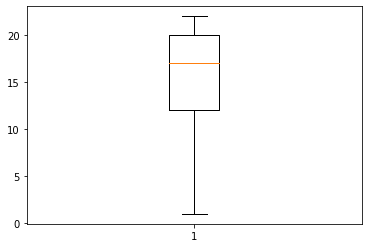

Reco_Policy_Premium


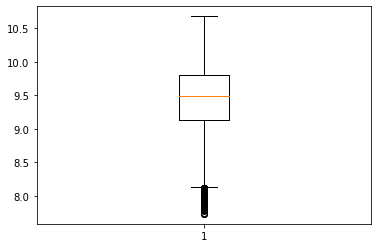

Response


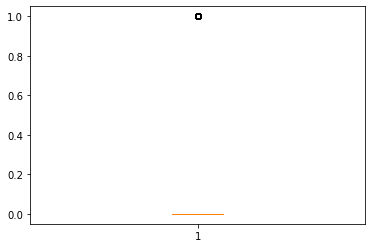

In [95]:
for i in df.columns:
    print(i)
    plt.boxplot(df[i])
    plt.show()
   

In [96]:
# we will Re4move Region code because of ouliers

In [97]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [98]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

ID                             0
City_Code                    741
Region_Code                  201
Accomodation_Type              0
Reco_Insurance_Type        10346
Lower_Age                      0
Is_Spouse                   8422
Health Indicator             435
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium          154
Response                   12209
dtype: int64

In [99]:
df['Region_Code'].value_counts()

1       96
5       75
2       73
6       73
4       73
        ..
5548     1
5671     1
5639     1
5686     1
5524     1
Name: Region_Code, Length: 5316, dtype: int64

In [100]:
df['Region_Code'].quantile(0.5)

1391.0

In [101]:
df['Region_Code']=[0 if x <1391 else 1 for x in df['Region_Code']] 

(array([25429.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25453.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

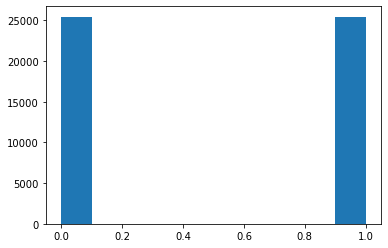

In [102]:
plt.hist(df['Region_Code'])

In [103]:
df['Reco_Insurance_Type'].value_counts()

0    40536
1    10346
Name: Reco_Insurance_Type, dtype: int64

In [104]:
Q1 = df['Reco_Policy_Premium'].quantile(0.25)
Q3 = df['Reco_Policy_Premium'].quantile(0.75)
IQR = Q3 - Q1

In [105]:
((df['Reco_Policy_Premium'] < (Q1 - 1.5 * IQR)) | (df['Reco_Policy_Premium'] > (Q3 + 1.5 * IQR))).sum()

154

In [106]:
df['Reco_Policy_Premium'].quantile(0.25)

9.13216259091216

In [141]:
df['Reco_Policy_Premium'].loc[(df['Reco_Policy_Premium'] < (Q1 - 1.5 * IQR))] = np.nan
df['Reco_Policy_Premium'].fillna(10,inplace=True)
test['Reco_Policy_Premium'].loc[(test['Reco_Policy_Premium'] < (Q1 - 1.5 * IQR))] = np.nan
test['Reco_Policy_Premium'].fillna(10,inplace=True)


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [108]:
df['Reco_Policy_Premium'].isnull().sum()

0

In [109]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3,1,1,0,36,0,0,15,3.0,22,9.361171,0
1,2,5,0,0,1,22,0,1,15,3.0,22,10.325810,0
2,3,5,1,0,0,32,0,0,1,1.0,19,8.915969,1
3,4,24,1,0,1,48,0,0,15,3.0,19,9.785830,0
4,5,8,1,1,0,44,0,1,3,1.0,16,9.249946,0


In [110]:
df.drop(['City_Code'],axis=1,inplace=True)

In [111]:
df.head()

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,1,1,0,36,0,0,15,3.0,22,9.361171,0
1,2,0,0,1,22,0,1,15,3.0,22,10.325810,0
2,3,1,0,0,32,0,0,1,1.0,19,8.915969,1
3,4,1,0,1,48,0,0,15,3.0,19,9.785830,0
4,5,1,1,0,44,0,1,3,1.0,16,9.249946,0


In [112]:
positive_Response_df = df.loc[df['Response'] == 1]#left 
negative_Response_df = df.loc[df['Response'] == 0]

(array([6095.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6114.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

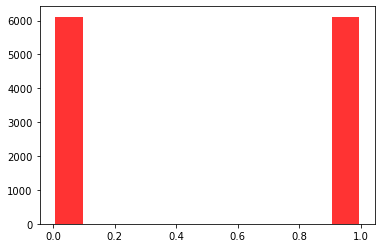

In [113]:
plt.hist(positive_Response_df['Region_Code'],  alpha=0.8, rwidth=0.9, color='red')

(array([19334.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19339.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

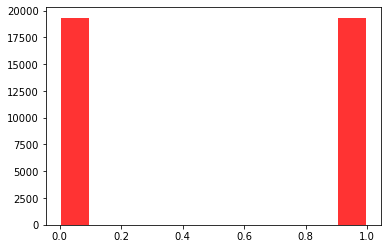

In [114]:
plt.hist(negative_Response_df['Region_Code'],  alpha=0.8, rwidth=0.9, color='red')

In [115]:
#b region code has no effect 

In [116]:
import seaborn as sns

Accomodation_Type


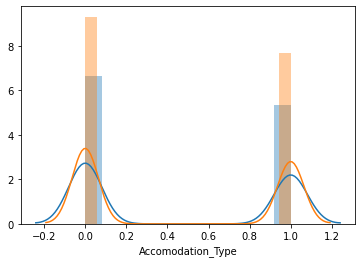

Reco_Insurance_Type


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


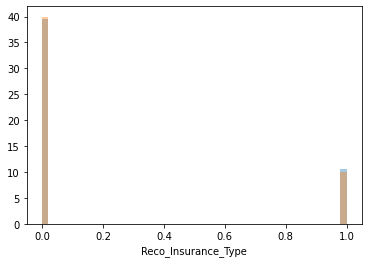

Lower_Age


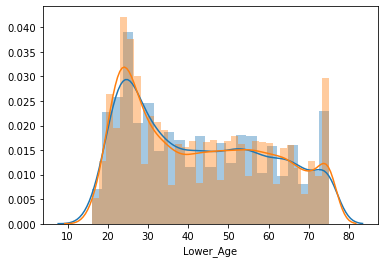

Is_Spouse


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


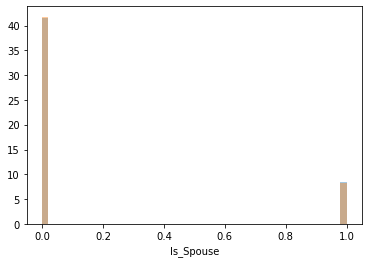

Health Indicator


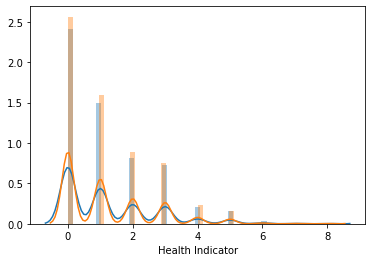

Holding_Policy_Duration


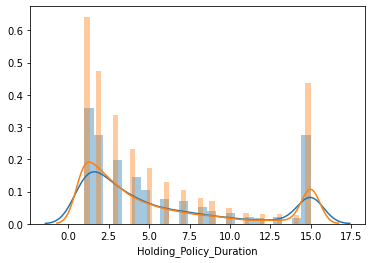

Holding_Policy_Type


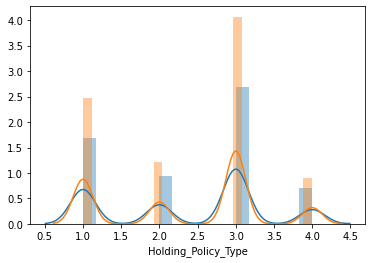

Reco_Policy_Cat


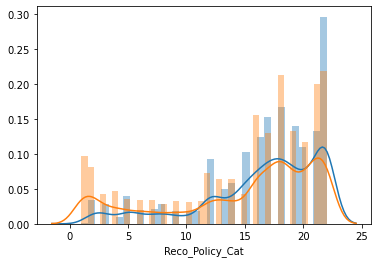

Reco_Policy_Premium


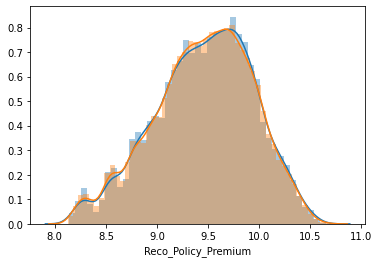

Response


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


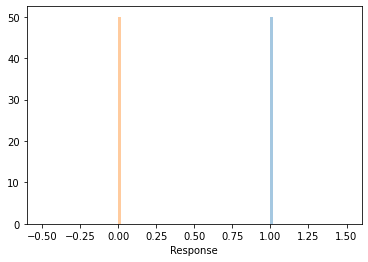

In [117]:
for i in df.columns[2:]:
    print(i)
    sns.distplot(positive_Response_df[i],label='positive attrition')
    sns.distplot(negative_Response_df[i], label='Negative attrition')
    plt.show()

In [118]:
df.columns

Index(['ID', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Lower_Age', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response'],
      dtype='object')

In [119]:
df.shape

(50882, 12)

In [120]:
df['Health Indicator'].value_counts()

0    20878
1    12965
2     7235
3     6193
4     1835
5     1341
6      247
7       98
8       90
Name: Health Indicator, dtype: int64

In [142]:
df['Health Indicator'].loc[(df['Health Indicator'] >5)] = np.nan
df['Health Indicator'].fillna(5,inplace=True)
test['Health Indicator'].loc[(test['Health Indicator'] >5)] = np.nan
test['Health Indicator'].fillna(5,inplace=True)
    

In [122]:
df.isnull().sum()

ID                         0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [143]:
cat = ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse', 'Holding_Policy_Type','Health Indicator']

In [144]:
catdat=df[cat]
catdat

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Type,Health Indicator
0,1,0,0,3.0,0.0
1,0,1,0,3.0,1.0
2,0,0,0,1.0,0.0
3,0,1,0,3.0,0.0
4,1,0,0,1.0,1.0
...,...,...,...,...,...
50877,1,0,0,3.0,2.0
50878,1,0,0,3.0,2.0
50879,1,0,0,1.0,1.0
50880,0,1,0,2.0,1.0


In [145]:
fin =pd.concat([df,pd.get_dummies(df['Accomodation_Type'],prefix = 'Accomodation_Type'),
           pd.get_dummies(df['Reco_Insurance_Type'],prefix = 'Reco_Insurance_Type'),
           pd.get_dummies(df['Is_Spouse'],prefix = 'Is_Spouse'),
           pd.get_dummies(df['Holding_Policy_Type'],prefix = 'Holding_Policy_Type'),
           pd.get_dummies(df['Health Indicator'],prefix = 'Health Indicator')],axis=1)

In [146]:
fin.drop(cat,axis=1,inplace=True)

In [147]:
fin.shape

(50882, 24)

In [148]:
fin.columns

Index(['ID', 'City_Code', 'Region_Code', 'Lower_Age',
       'Holding_Policy_Duration', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response', 'Accomodation_Type_0', 'Accomodation_Type_1',
       'Reco_Insurance_Type_0', 'Reco_Insurance_Type_1', 'Is_Spouse_0',
       'Is_Spouse_1', 'Holding_Policy_Type_1.0', 'Holding_Policy_Type_2.0',
       'Holding_Policy_Type_3.0', 'Holding_Policy_Type_4.0',
       'Health Indicator_0.0', 'Health Indicator_1.0', 'Health Indicator_2.0',
       'Health Indicator_3.0', 'Health Indicator_4.0', 'Health Indicator_5.0'],
      dtype='object')

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
input_data = df

In [41]:
input_data.isnull().sum()

ID                         0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [42]:
target_data = df['Response']

In [50]:
lst = list()

In [59]:
fin.head()

,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Premium,ID,Accomodation_Type,Reco_Insurance_Type,Reco_Policy_Cat,Response,Lower_Age
0,15,3.0,9.361171,1,1,0,22,0,36
1,15,3.0,10.325810,2,0,1,22,0,22
2,1,1.0,8.915969,3,0,0,19,1,32
3,15,3.0,9.785830,4,0,1,19,0,48
4,3,1.0,9.249946,5,1,0,16,0,44


In [51]:
col_values = list(input_data.columns.values)
feature_scores = mutual_info_classif(input_data, target_data)
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:7]:#Displays top 15
    print(fname, score)
    lst.append(fname)

Response 0.5517169006763052
Reco_Policy_Cat 0.02307267446166783
Reco_Policy_Premium 0.004653616876373556
Holding_Policy_Type 0.004629269051666496
Reco_Insurance_Type 0.002438760537012419
Lower_Age 0.0021320959543564832
Holding_Policy_Duration 0.001574013178961442


In [52]:
feature_scores = chi2(input_data, target_data)[0]
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:7]:#display Top 15
    print(fname, score)
    lst.append(fname)

Response 38673.0
ID 11483.328483138204
Reco_Policy_Cat 1768.7263858991034
Holding_Policy_Duration 80.08925393663186
Reco_Insurance_Type 3.965972188162686
Lower_Age 1.5729296302442544
Accomodation_Type 0.7561145696017539


In [54]:
list(set(lst))

['Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Premium',
 'ID',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Reco_Policy_Cat',
 'Response',
 'Lower_Age']

In [55]:
fin = df[list(set(lst))]

In [129]:
X  = fin[fin.drop(['ID','Response'],axis=1).columns]
y= fin['Response']

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [149]:
clf = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1,max_depth=7, random_state=0).fit(X,y)
clf2 = RandomForestClassifier(n_estimators=80).fit(X,y)
clf3 = GaussianNB().fit(X,y)
clf4= MLPClassifier(random_state=1,max_iter=120, activation='logistic',solver='sgd',learning_rate="adaptive").fit(X, y)
clf5= AdaBoostClassifier(n_estimators=120, random_state=0).fit(X,y)

In [150]:
X.columns

Index(['Region_Code', 'Lower_Age', 'Holding_Policy_Duration',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Accomodation_Type_0',
       'Accomodation_Type_1', 'Reco_Insurance_Type_0', 'Reco_Insurance_Type_1',
       'Is_Spouse_0', 'Is_Spouse_1', 'Holding_Policy_Type_1.0',
       'Holding_Policy_Type_2.0', 'Holding_Policy_Type_3.0',
       'Holding_Policy_Type_4.0', 'Health Indicator_0.0',
       'Health Indicator_1.0', 'Health Indicator_2.0', 'Health Indicator_3.0',
       'Health Indicator_4.0', 'Health Indicator_5.0'],
      dtype='object')

In [151]:
fintes =pd.concat([test,pd.get_dummies(test['Accomodation_Type'],prefix = 'Accomodation_Type'),
           pd.get_dummies(test['Reco_Insurance_Type'],prefix = 'Reco_Insurance_Type'),
           pd.get_dummies(test['Is_Spouse'],prefix = 'Is_Spouse'),
           pd.get_dummies(test['Holding_Policy_Type'],prefix = 'Holding_Policy_Type'),
           pd.get_dummies(test['Health Indicator'],prefix = 'Health Indicator')],axis=1)

In [152]:
test = fintes.drop(cat,axis=1,inplace=False)

In [153]:
test.columns

Index(['ID', 'City_Code', 'Region_Code', 'Lower_Age',
       'Holding_Policy_Duration', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Accomodation_Type_0', 'Accomodation_Type_1', 'Reco_Insurance_Type_0',
       'Reco_Insurance_Type_1', 'Is_Spouse_0', 'Is_Spouse_1',
       'Holding_Policy_Type_1', 'Holding_Policy_Type_2',
       'Holding_Policy_Type_3', 'Holding_Policy_Type_4',
       'Health Indicator_0.0', 'Health Indicator_1.0', 'Health Indicator_2.0',
       'Health Indicator_3.0', 'Health Indicator_4.0', 'Health Indicator_5.0'],
      dtype='object')

In [154]:
out1 = clf.predict_proba(test.drop(['ID', 'City_Code'],axis=1))[:,1]
out2 = clf2.predict_proba(test.drop(['ID', 'City_Code'],axis=1))[:,1]
out3 = clf3.predict_proba(test.drop(['ID', 'City_Code'],axis=1))[:,1]
out4 = clf4.predict_proba(test.drop(['ID', 'City_Code'],axis=1))[:,1]
out5 = clf5.predict_proba(test.drop(['ID', 'City_Code'],axis=1))[:,1]


In [155]:
out = (out1+out2+out3+out4+out5)/5

In [156]:
ot = pd.DataFrame()
ot['ID']=test['ID']
ot['Response'] = pd.Series(out)
ot.to_csv("output.csv",index=False)